Solution has converged
For size of A matrix: 100
Number of iterations to converge solution: 7
Time take to converge to solution: 0.31102895736694336
Value of x: 10.00002959861573
   Iteration    Residual      Time
0          0  476.177993  0.065375
1          1   39.852100  0.108378
2          2    9.802447  0.156549
3          3    1.634591  0.192162
4          4    0.220930  0.230051
5          5    0.053508  0.271365
6          6    0.008014  0.310150


Text(0, 0.5, 'Residual')

<Figure size 432x288 with 0 Axes>

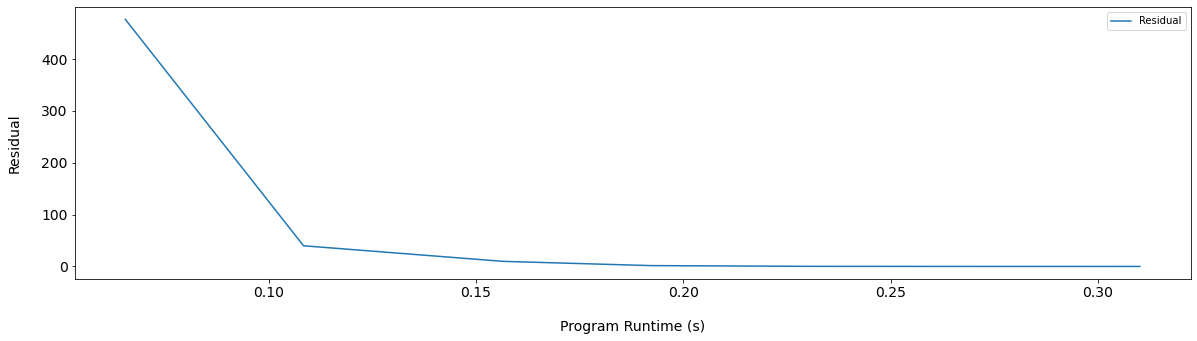

In [587]:
# Converting MATLAB SOR Function to Python for Successive Over Relaxation
import time
import sys
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

def SOR(A, b ,w, convergence):
    
    tic = time.time()

    #Defining critical values
    n = len(b) #Identify dimension of n
    xnew = np.zeros((n,1))
    residual = np.linalg.norm(np.matmul(A, xnew) - b)
    itera = 0 #iteration counter
    backstop = 100 #end program after "" iterations
    global df_residual #making the dataframe a global variable to call it from function
    data=[]

    
    while residual > convergence:
        
        xprev = xnew[:] #xprev takes on the previous x values each iteration

        for i in range(n):
            
            sigma = 0 #reset sigma every iteration
            
            for j in range(n):
                
                #Create exception diagonal elements
                if j != i:
                        
                   #Summing the upper and lower matrix triangles togther 
                    sigma += (A[i,j] * xprev[j])
     
            #Main Equation for SOR
            xnew[i] = + (1-w)*xprev[i]+((w/A[i,i]) * (b[i] - sigma)) 
            
        
        #Calculating residual value
        residual = (np.linalg.norm(np.matmul(A, xnew) - b))
    
        #Appending Data into Individual Lists at end of each loop
        data.append([itera, residual, time.time() - tic])
        
        #Iteration Counter
        itera += 1
        
        #Prevent program running infinitely
        if itera > backstop: 
            df_residual = pd.DataFrame(data, columns=['Iteration','Residual','Time'])
            break
        
    #Output
    df_residual = pd.DataFrame(data, columns=['Iteration','Residual','Time'])
    x = np.linalg.norm(xnew)
    toc = time.time() - tic
    
    if residual < convergence:
        print('Solution has converged')
        print('For size of A matrix:', n)
        print('Number of iterations to converge solution:', itera)
        print('Time take to converge to solution:', toc)
        print('Value of x:', x)
    
    else:
        print('Solution has not converged')
                  
#Performing SOR function at fixed relaxation factor in Python

w = 0.9          #Relaxation factor 
convergence = 0.01  #Convergence critiera
n = 100             #Size of nxn matrix
A = np.ones((n,n))  #Defining Dimensions of A Array
b = np.zeros((n,1)) #Defining Dimensions of b vector


for i in range(n):
     A[i,i] = n   #Add diagonal n
     b[i] = 2*n - 1 #Add b variable to b vector

SOR(A,b,w,convergence)
print(df_residual)

#Plotting Residual vs Time
plt.figure()
df_residual.plot(x = "Time", y= "Residual",kind="line",figsize=(20, 5),fontsize=14)
plt.xlabel("Program Runtime (s)", labelpad=20,fontsize=14)
plt.ylabel("Residual", labelpad=20,fontsize=14)


